In [1]:
# Import libraries
import numpy as np
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
# Point 1.
# Donwload a joint dataset of closing prices for the last 3 years
tickers = ['META', 'TSLA']
stocks = yf.Tickers(tickers)
hist_data = stocks.history(period='3y')['Close']
# Delete rows (if any) with NaN
hist_data = hist_data.dropna()
hist_data

[*********************100%***********************]  2 of 2 completed


,META,TSLA
Date,,
2021-05-17,315.125641,192.276672
2021-05-18,309.631470,192.623337
2021-05-19,313.257629,187.820007
2021-05-20,318.272308,195.593338
2021-05-21,315.894836,193.626663
...,...,...
2024-05-13,468.010010,171.889999
2024-05-14,471.850006,177.550003
2024-05-15,481.540009,173.990005


In [3]:
# Point 2.
# Extract the last available prices
on_date = '2024-05-17'
S1_0 = hist_data['META'][on_date]
S1_0

471.8299865722656

In [4]:
S2_0 = hist_data['TSLA'][on_date]
S2_0

177.01119995117188

In [5]:
# Create an array of current share prices
share_prices = np.array([S1_0, S2_0])

In [6]:
# Point 3.
# Create an array of shares
theta = np.array([3000, 2000])

In [7]:
# Point 4.
# Compute the price of the portfolio (.dot is the scalar product of vectors)
initial_investment = theta.dot(share_prices)
initial_investment

1769512.3596191406

In [8]:
# Point 5.
# Compute the array of weights (* is the component-wise product of vectors)
weights = (theta * share_prices) / initial_investment
weights

array([0.79993223, 0.20006777])

In [9]:
# Point 6.
# Compute daily return rates
return_rates = hist_data.pct_change()
return_rates = return_rates.dropna()
return_rates

,META,TSLA
Date,,
2021-05-18,-0.017435,0.001803
2021-05-19,0.011711,-0.024936
2021-05-20,0.016008,0.041387
2021-05-21,-0.007470,-0.010055
2021-05-24,0.026563,0.044002
...,...,...
2024-05-13,-0.017199,0.020300
2024-05-14,0.008205,0.032928
2024-05-15,0.020536,-0.020051


In [10]:
# Point 7.
# Compute the mean of return rates
mean_return_rates = return_rates.mean()
mean_return_rates

META    0.001007
TSLA    0.000545
dtype: float64

In [11]:
# Generate the variance-covariance matrix
cov_matrix = return_rates.cov()
cov_matrix

,META,TSLA
META,0.000931,0.000350
TSLA,0.000350,0.001308


In [12]:
# Point 8.
# Compute the mean of portfolio r.r.
mean_port = mean_return_rates.dot(weights)
mean_port

0.0009145724996632721

In [13]:
# Compute the standard deviation of portfolio r.r.
std_port = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
std_port

0.027566698876310088

In [14]:
# Point 9.
# Compute the z-value
alpha = 0.99
z_value = norm.ppf(1 - alpha)
z_value

-2.3263478740408408

In [15]:
# Compute the (1- alpha)th quantile
quantile = mean_port + std_port * z_value
quantile

-0.06321515882556474

In [16]:
# Compute the (absolute) VaR of the portfolio
VaR_port = - initial_investment * quantile
print('The VaR of the portfolio is:', VaR_port)

The VaR of the portfolio is: 111860.0048571238


In [17]:
# Point 10.
# Compute the VaR enlarging the time horizon
VaR_days = []

horizons = range(1, 16)

for k in horizons: # k = 1, 2, ..., 15
    VaR_k = np.sqrt(k) * VaR_port
    VaR_days.append(VaR_k)

In [18]:
VaR_days

[111860.0048571238,
 158193.9359560648,
 193747.2117474398,
 223720.0097142476,
 250126.5748239855,
 273999.9345252012,
 295953.7545064268,
 316387.8719121296,
 335580.0145713714,
 353732.39442600904,
 370997.66515841224,
 387494.4234948796,
 403316.98318601074,
 418541.8134582262,
 433231.93591832125]

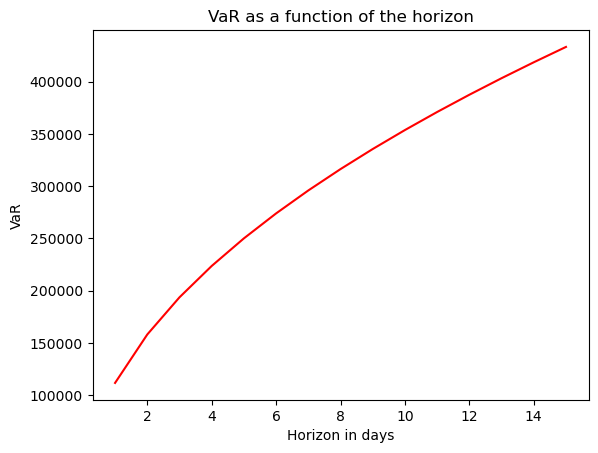

In [19]:
# Plot VaR as a function of the horizon
import matplotlib.pyplot as plt

plt.xlabel('Horizon in days')
plt.ylabel('VaR')
plt.title('VaR as a function of the horizon')
plt.plot(horizons, VaR_days, color='red')